<a href="https://colab.research.google.com/github/Sushmithaa-Pandian/Machine_learning_sush/blob/main/Wetdry2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/soil/Train'
valid_path = '/content/drive/MyDrive/soil/Test'
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/soil/Train/*')

In [9]:
x = Flatten()(mobilnet.output)
prediction = Dense(units=1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [10]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/soil/Train',
                                                 target_size = (224, 224),

                                                 class_mode = 'binary')

Found 20 images belonging to 2 classes.


In [11]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/soil/Test',
                                            target_size = (224, 224),

                                            class_mode = 'binary')

Found 8 images belonging to 2 classes.


In [25]:
labels = {value: key for key, value in training_set.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Dry
1 : Wet


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-12-070b10e8c207>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
1/1 [==============================] - 31s 31s/step - loss: 0.5950 - accuracy: 0.6500 - val_loss: 0.9880 - val_accuracy: 0.3750
Epoch 2/50
1/1 [==============================] - 20s 20s/step - loss: 0.9689 - accuracy: 0.3500 - val_loss: 0.4209 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 21s 21s/step - loss: 0.4108 - accuracy: 0.9500 - val_loss: 0.5213 - val_accuracy: 0.6250
Epoch 4/50
1/1 [==============================] - 20s 20s/step - loss: 0.4856 - accuracy: 0.6500 - val_loss: 0.5247 - val_accuracy: 0.6250
Epoch 5/50
1/1 [==============================] - 22s 22s/step - loss: 0.5766 - accuracy: 0.7000 - val_loss: 0.3358 - val_accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 25s 25s/step - loss: 0.4233 - accuracy: 0.7500 - val_loss: 0.1865 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 25s 25s/step - loss: 0.1656 - accuracy: 0.9500 - val_loss: 0.1861 - val_accuracy: 1.0000
Epoch 8/50
1/1 [===========

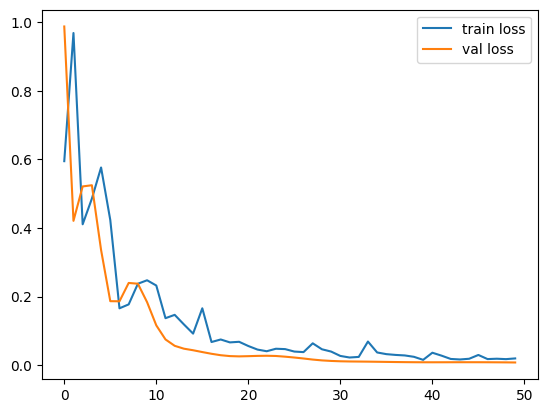

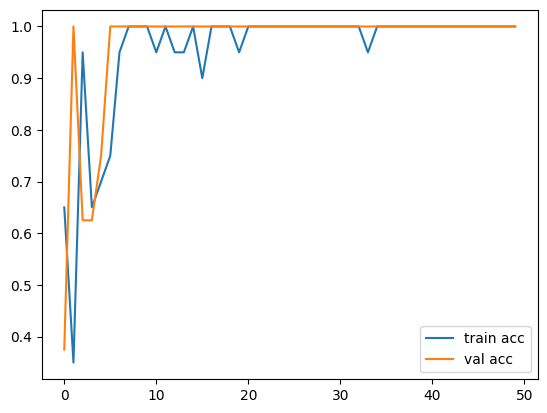

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [14]:
predictions = model.predict(test_set)

1/1 [==============================] - 5s 5s/step


In [15]:
test_loss, test_accuracy = model.evaluate(test_set)

1/1 [==============================] - 7s 7s/step - loss: 0.0076 - accuracy: 1.0000


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_set.classes

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
cf_mtx = confusion_matrix(y_true, y_pred)

In [26]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

         Dry       0.62      1.00      0.77         5
         Wet       0.00      0.00      0.00         3

    accuracy                           0.62         8
   macro avg       0.31      0.50      0.38         8
weighted avg       0.39      0.62      0.48         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


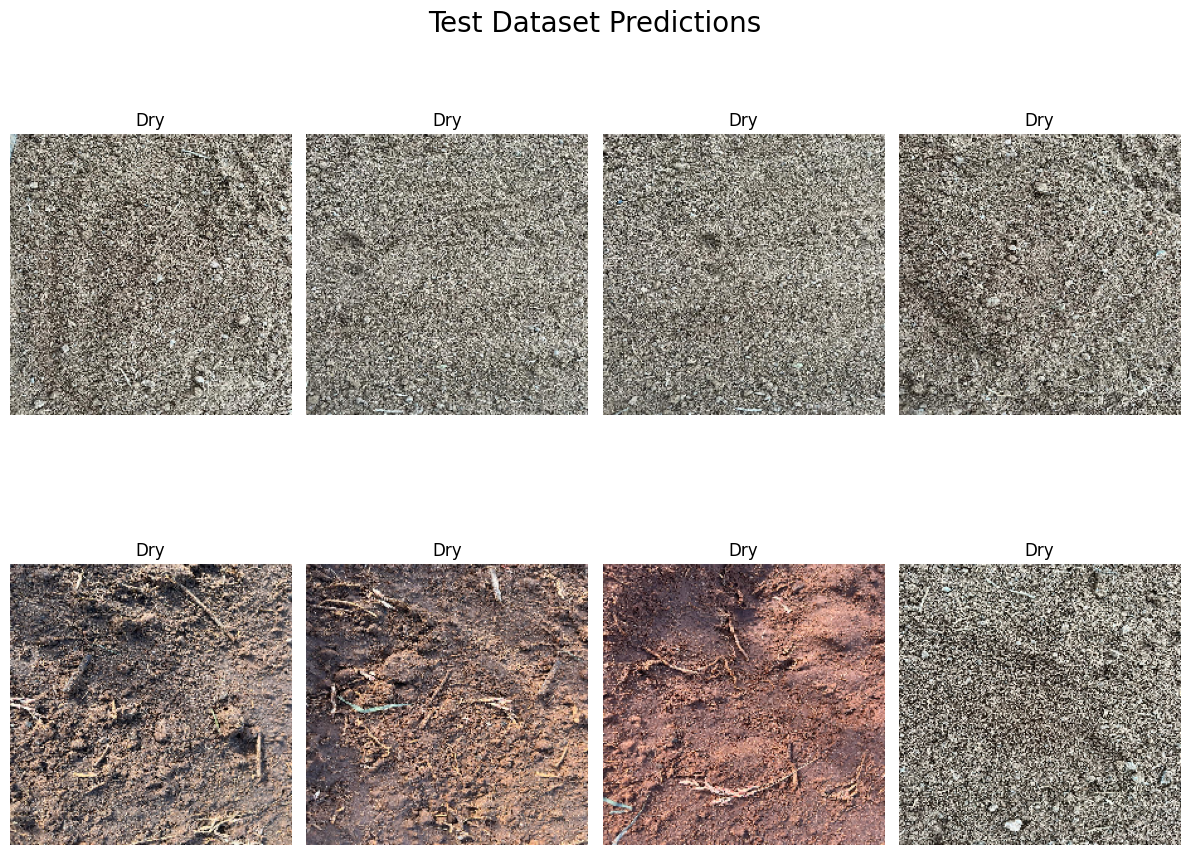

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(4):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_set[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()